In [11]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import TransformerMixin
from sklearn.pipeline import make_pipeline

In [6]:
import glob
import os

In [7]:
import seaborn as sns

In [79]:
class ColExtractor(TransformerMixin):
    def __init__(self, cols):
        self.cols = cols
    def fit(self, X, y=None):
        return self
    def transform(self,X):
        Xcols = X[self.cols]
        return Xcols

In [8]:
DATA_PATH = './data'

In [70]:
train_df = pd.read_csv(os.path.join(DATA_PATH, 'train.csv'))
test_df = pd.read_csv(os.path.join(DATA_PATH, 'test.csv'))

In [71]:
le_sex = LabelEncoder().fit(train_df.Sex)
train_df['Sex'] = le_sex.transform(train_df.Sex)
test_df['Sex'] = le_sex.transform(test_df.Sex)

In [48]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [12]:
profile = ProfileReport(train_df, 'TRAIN DF')
profile

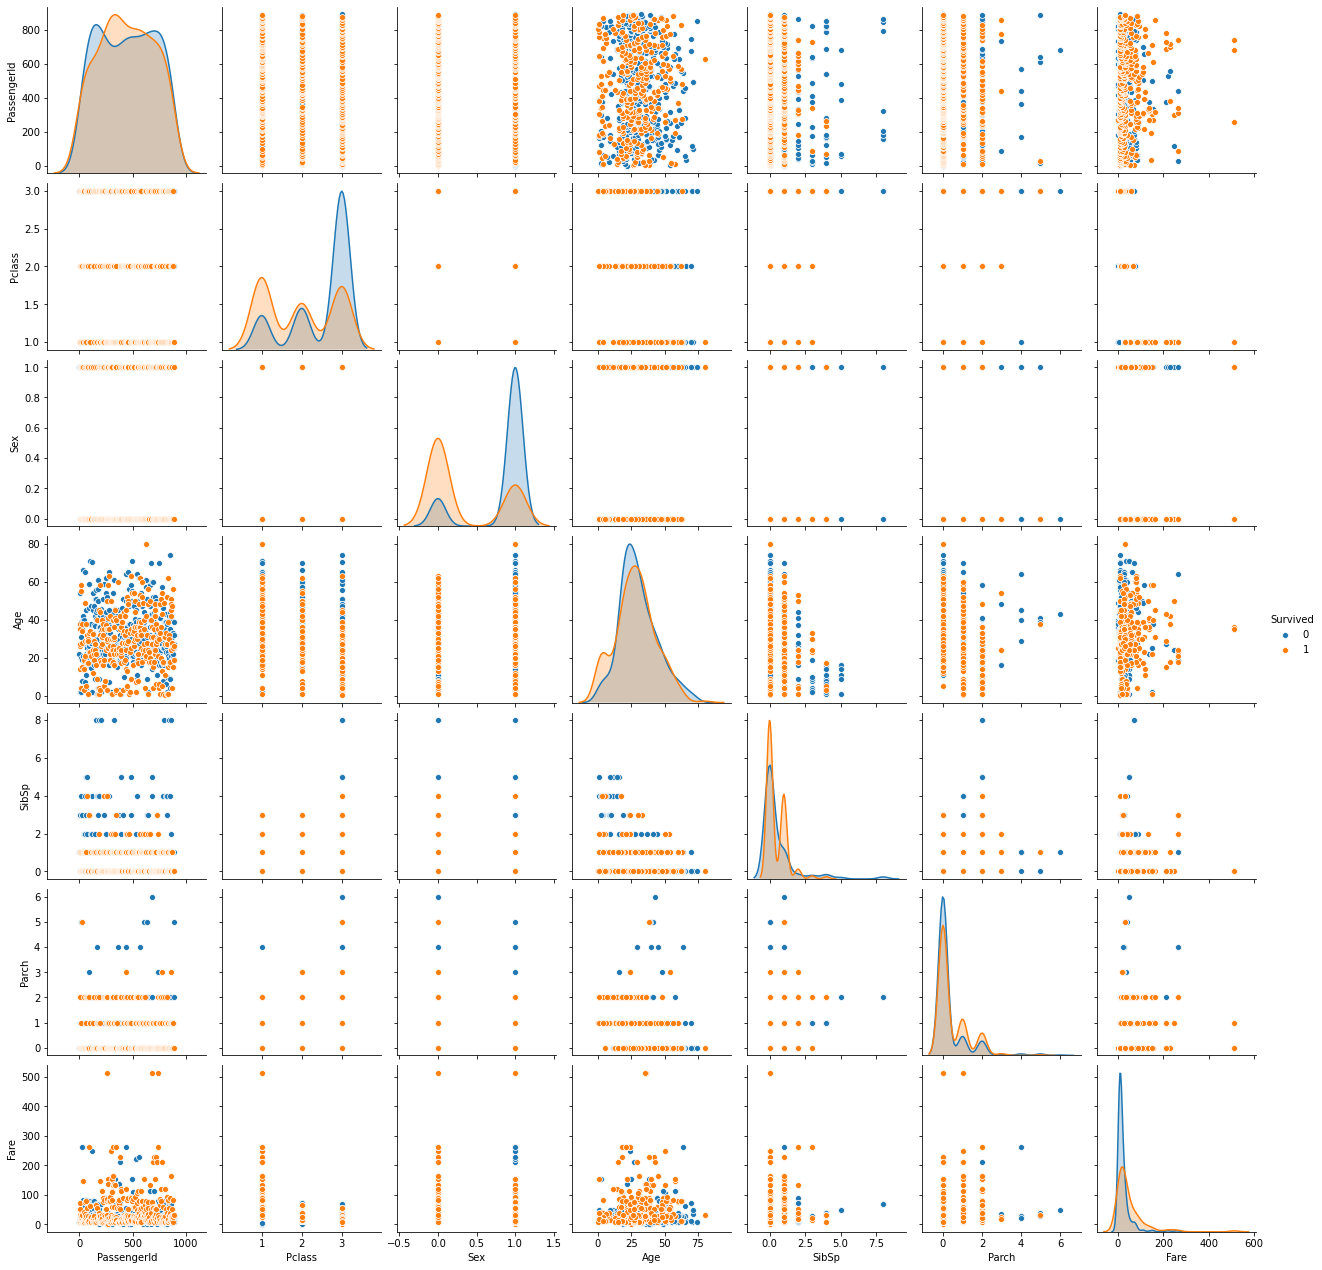

In [75]:
sns.pairplot(train_df, hue='Survived')

### Discussion on Explorative Feature Investigation

- Many features do not seem to be very helpful on first glance
- Pclass and Sex seem to be the most discriminative features

In [49]:
train_y = train_df.pop('Survived')
#test_y = test_df.pop('Survived')

In [84]:
ce = ColExtractor(test_df.select_dtypes(exclude='object').keys())
si = SimpleImputer()

In [86]:
prep_pipeline = make_pipeline(ce,si)

In [88]:
test_df1 = prep_pipeline.fit_transform(test_df)
train_df1 = prep_pipeline.transform(train_df)

In [50]:
test_df1 = test_df.select_dtypes(exclude='object')
test_df1 = test_df1.fillna(test_df1.mean())

train_df1 = train_df.select_dtypes(exclude='object')
train_df1 = train_df1.fillna(train_df1.mean())

In [89]:
clf = RandomForestClassifier(random_state=1)

In [90]:
clf.fit(train_df1, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [93]:
y_pred = clf.predict(test_df1)

In [96]:
submission_df = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': y_pred})

In [97]:
submission_df.to_csv('./submissions/baseline_rf.csv',index=False)